In [1]:
import pandas as pd
import matplotlib.pyplot as plt
Company_Data = pd.read_csv("C:\\Users\\kbinm18407\\Desktop\\DATA\\Assessment\\Decision Tree\\Company_Data.csv")
Company_Data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [2]:
Company_Data.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [3]:
Company_Data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [4]:
Company_Data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
Company_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
Company_Data['ShelveLoc'],class_names = pd.factorize(Company_Data['ShelveLoc'])
Company_Data.ShelveLoc
print(class_names)

Index(['Bad', 'Good', 'Medium'], dtype='object')


In [7]:
Company_Data['Urban'],class_names2=pd.factorize(Company_Data['Urban'])
print(class_names2)

Index(['Yes', 'No'], dtype='object')


In [8]:
Company_Data['US'].replace(to_replace=['Yes', 'No'],value= ['0', '1'], inplace=True)
Company_Data.US


0      0
1      0
2      0
3      0
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: US, Length: 400, dtype: object

In [9]:
print(Company_Data['US'].unique())
Company_Data.info()

['0' '1']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    int64  
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    int64  
 10  US           400 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 34.5+ KB


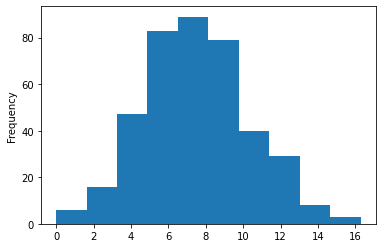

In [10]:
Company_Data['Sales'].plot.hist()
plt.show()

In [11]:
Company_Data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [12]:
category = pd.cut(Company_Data.Sales,bins=[0,5.39,9.32,17],labels=['low','moderate','high'])
Company_Data.insert(0,'Sales_Group',category)

In [13]:
Company_Data.drop(['Sales'],axis = 1, inplace = True)


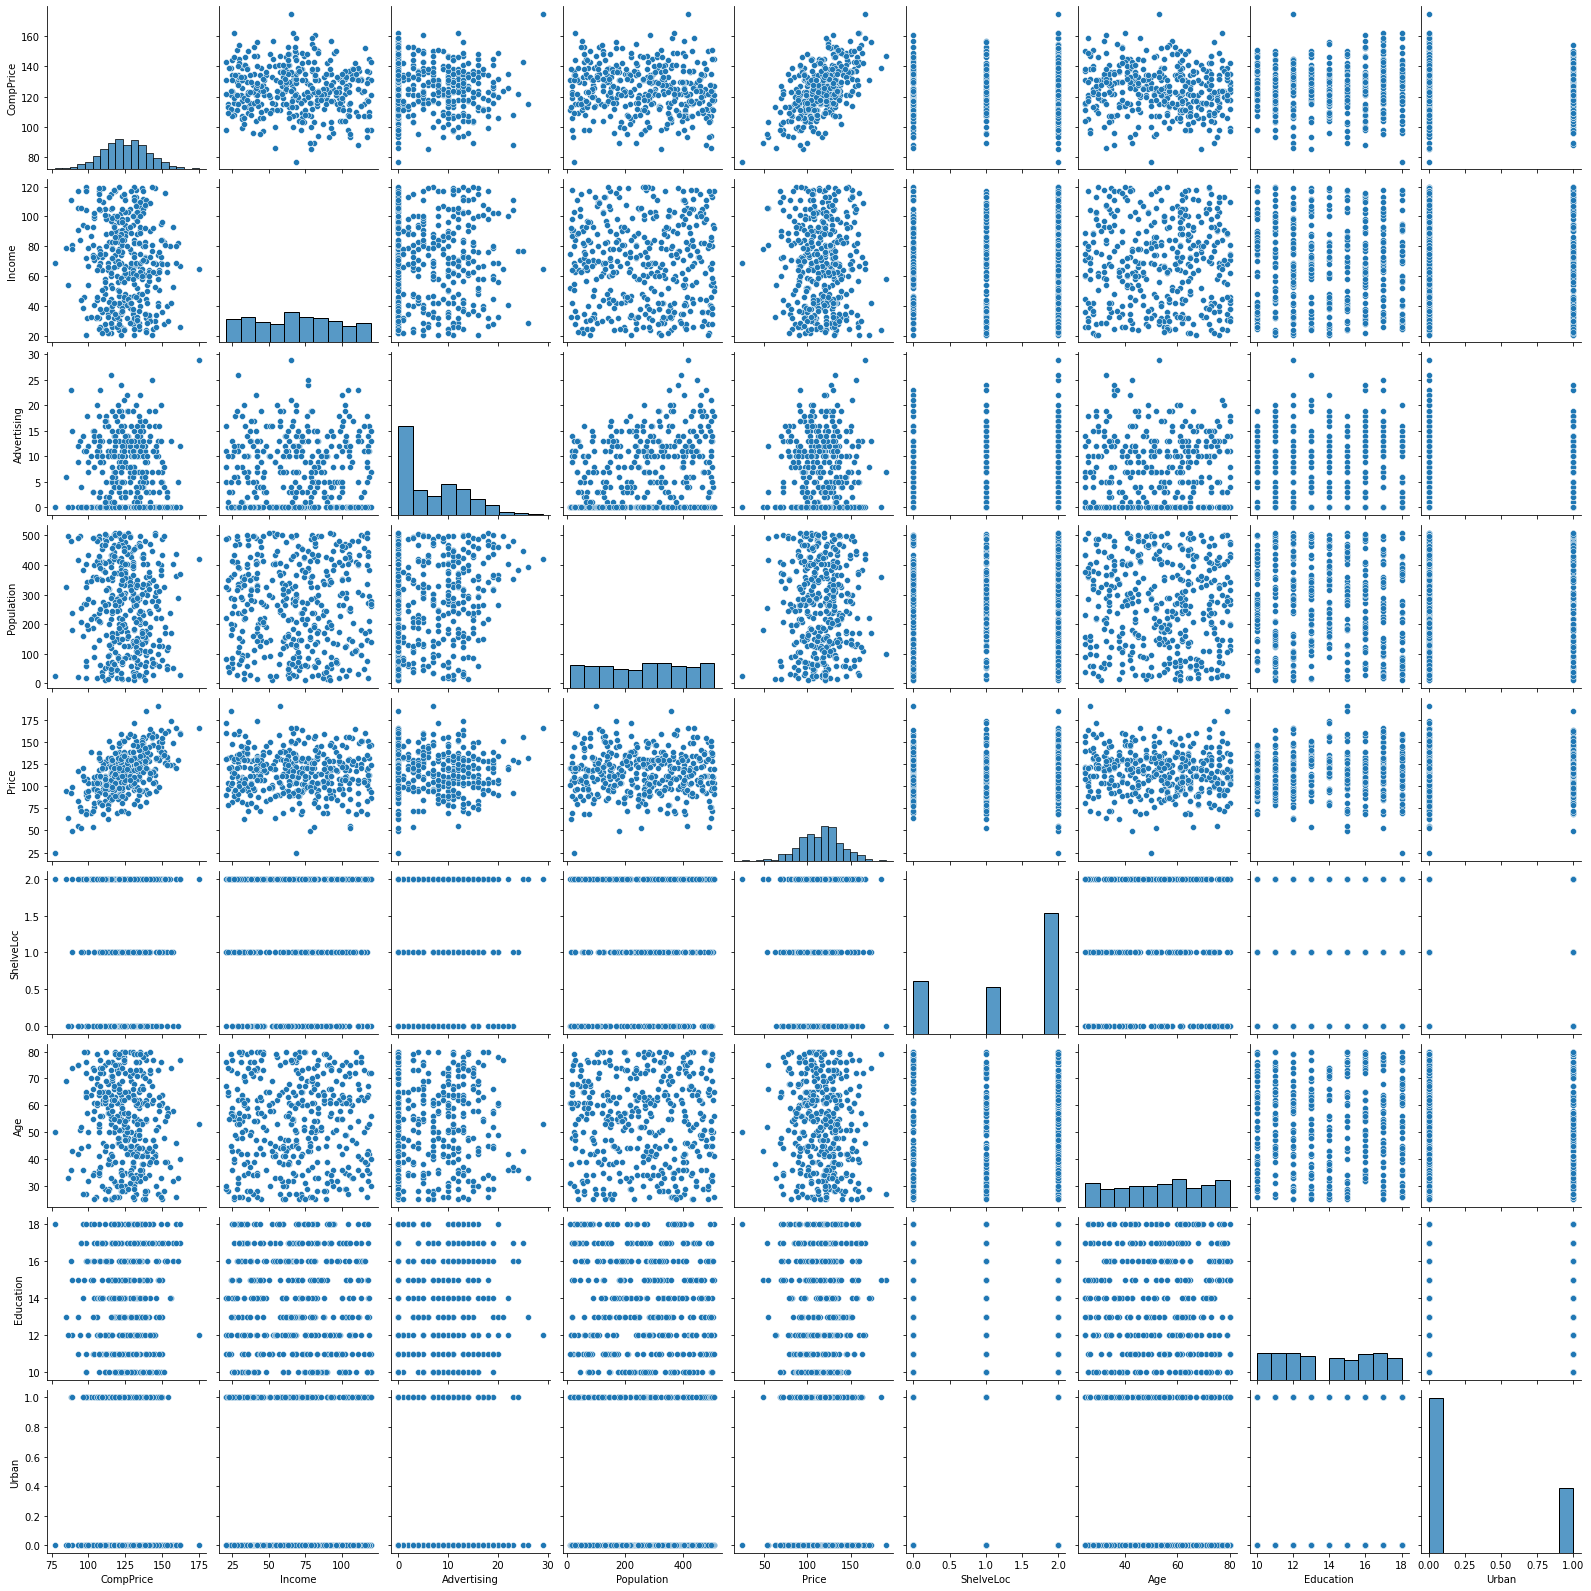

In [14]:
import seaborn as sns
sns.pairplot(Company_Data)

In [15]:
Company_Data['Sales_Group'].unique()
Company_Data.Sales_Group.value_counts()

moderate    201
low          99
high         99
Name: Sales_Group, dtype: int64

In [16]:
colnames = list(Company_Data.columns)
colnames
predictors = colnames[1:]

In [17]:
target = colnames[0]
target        

'Sales_Group'

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
train,test = train_test_split(Company_Data,test_size = 0.2)
test
test.shape 


(80, 11)

In [19]:
train
train.shape

(320, 11)

In [23]:
from sklearn.tree import  DecisionTreeClassifier
help(DecisionTreeClassifier)

model = DecisionTreeClassifier(criterion = 'entropy')

model.fit(train[predictors],train[target])

preds = model.predict(test[predictors])

preds

from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(test[target], preds))



pd.Series(preds).value_counts()

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best ran

ValueError: Input contains NaN